## Step1:Import all necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

CALCULATING RMSE AND R2

In [4]:
# Reading Data
data = pd.read_csv('housing_prices_SLR.csv')
print(data.shape)
data.head()

(50, 2)


,AREA,PRICE
0,1000,5618
1,1030,5201
2,1060,4779
3,1090,5425
4,1120,5657


In [0]:
# Collecting X and Y
X = data['AREA'].values
Y = data['PRICE'].values

In [6]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

print(mean_x)
print(mean_y)

# Total number of values
n = len(X)
print(n)


1735.0
10480.82
50


In [7]:
# Using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
# Printing coefficients
print("Coefficients")
print(b1, b0)

Coefficients
8.152721888755503 -3664.1524769907974


In [0]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

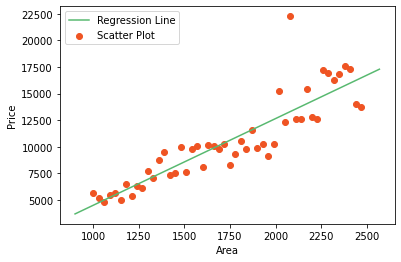

In [9]:
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
1887.3165424825934


In [11]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.7776485026370863


# implementation of simple Linear Regression Model
# step2 :Load dataset

In [12]:
df=pd.read_csv("housing_prices_SLR.csv",delimiter=',')
df.head()

,AREA,PRICE
0,1000,5618
1,1030,5201
2,1060,4779
3,1090,5425
4,1120,5657


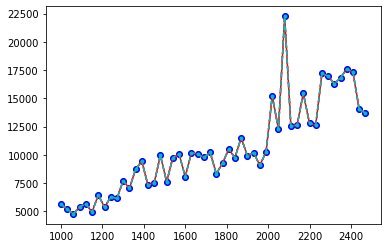

In [13]:
plt.scatter(df.AREA,df.PRICE,c='blue')
plt.plot(df.AREA,df.PRICE,"r")
plt.plot(df.AREA,df.PRICE,"--r")
plt.plot(df.AREA,df.PRICE,":r")
plt.plot(df.AREA,df.PRICE,"--.c")
plt.show()


# Step3:Feature matrix and Target vector

In [0]:
x=df[['AREA']].values#feature Matrix
y=df.PRICE.values#Target Matrix

In [15]:
print(x[:5]) #slicing
print(y[:5])

[[1000]
 [1030]
 [1060]
 [1090]
 [1120]]
[5618 5201 4779 5425 5657]


# step4:Split the data into 80-20

In [16]:
#from packagename import function
from sklearn.model_selection import train_test_split

#80 20 split,random_state to reproduce the same split everytime
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100) 

print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(40, 1)
(10, 1)
(40, 1)
(10, 1)


# step5: Fit the line:Train the SLR Model

In [17]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)

print(lr_model.intercept_) # (PRICE=(-4481.80028058845)+8.65903854)*AREA
print(lr_model.coef_)#y=c+mx

lr_model=LinearRegression(fit_intercept= False)

lr_model.fit(x_train,y_train)

print(lr_model.intercept_) # (PRICE=(-4481.80028058845)+8.65903854)*AREA
print(lr_model.coef_)#y=c+mx

-3103.34066448488
[7.75979089]
0.0
[6.03609138]


# step6:predict using the model

In [18]:
lr_model.predict(np.array([[2000],[2500]]))

array([12072.18276042, 15090.22845052])

In [19]:
from sklearn.metrics import r2_score
lr_model.predict(x_train)


array([ 6036.09138021,  8028.00153568,  9295.58072552, 14184.81474349,
       12917.23555365, 10563.15991537, 10744.24265677, 12373.98732943,
        9114.49798412,  7303.67057005, 14546.9802263 , 11649.6563638 ,
       11830.73910521,  9476.66346693,  9838.82894974,  8390.16701849,
        6217.17412162,  6760.42234583,  8209.08427708, 10925.32539818,
       13279.40103646, 10019.91169115, 11287.49088099,  7665.83605287,
        8933.41524271, 14003.73200208, 14728.06296771, 14365.8974849 ,
        8571.2497599 , 13460.48377787,  6398.25686302, 12192.90458802,
       11468.5736224 ,  7846.91879427,  8752.3325013 , 10200.99443255,
       13098.31829505,  6579.33960443, 10382.07717396,  7484.75331146])

In [20]:
lr_model.predict(x_test)

array([ 7122.58782865, 12555.07007083, 12736.15281224, 11106.40813958,
       13822.64926068, 14909.14570912,  6941.50508724, 12011.82184662,
        9657.74620833, 13641.56651927])

# step7:calculating R^2score using tain and test model

In [21]:
r2_score(y_train,lr_model.predict(x_train))  # 1.First way of calculating R2 score

0.820250203127675

In [22]:
r2_score(y_test,lr_model.predict(x_test))

0.5059420550739799

In [23]:
lr_model.score(x_test,y_test) #2.second way of calculating R2 score

0.5059420550739799

##Thank ou